# SCS 3253: Machine Learning
> Assignment 1: Classification

> May 2022

> Due Date: Tuesday June 7th, 6:30pm

### Your name & student number:

<pre> Name : Nnamdi Joseph Asouzu</pre> 

<pre> Student Number : qq435813</pre> 


# Instructions and Marking Guidelines
***
This assignment will account for 15% of your final grade. It is worth 22 marks in total, with 2 bonus marks available via an optional challenge at the end (note: your final assignment score will be capped at 100%). 

Please read the provided markdown (text) cells carefully. Some subsections contain multiple questions. Be sure to answer all questions. 

Answers should be provided within this same notebook and will be a mix of code, outputs (e.g. plots, trained models), and written reponses. 

#### TIPS

> 📝 **NOTE**: this first intro assignment is fairly structured; future assignments will be slightly more open-ended to allow for more 'organic' exploration of problems. 

> ⏳ **Please budget 4-5 hours to complete each assignment.** Reach out to us if you think your assignment will be more than 1 week late. 

> 📚 **You will likely need to refer to the documentation of libraries such as sklearn** while completing this assignment. Looking up things in 'the docs' is part of the day-to-day life of a Data Scientist. We encourage you to visit the docs if you haven't already. It's a great way to become more familiar and comfortable with the ML tools available to you.  
* You can find the scikit-learn docs [here](https://scikit-learn.org/stable/modules/classes.html)
* You can also find a variety of helpful guides and tutorials through the [main scikit-learn website](https://scikit-learn.org/stable/)
* Other helpful references can be found here:
 * [MatPlotLib](https://matplotlib.org/)
 * [Seaborn](seaborn.pydata.org)
 * [Pandas](https://pandas.pydata.org/docs/)
 * [Numpy](https://numpy.org/doc/)


> 💣  **When you enounter errors** (because it's a law of nature in coding), please carefully read what the error message is telling you. Debugging is a key skill to develop. It's about understanding the root cause of an error, trying a fix, and repeating with a new hypothesis as necessary. If you get totally stuck, try googling the error message. You can find many common errors and solutions documented on [stackoverflow](https://stackoverflow.com/). 



### Marking Guidelines

All questions will state the number of marks available, e.g. [X points].

In machine learning, there is not necessarily one "correct" answer to a given modelling problem. You **do not** need to have the "best" performing model in the class in order to receive full marks. Rather, we will be marking assignments individually, based on the following criteria:

* **Demonstration of core concepts [40%]**
 * Do your answers to written questions demonstrate you understand and can apply the core concepts taught in class? Are those answers justified by the calculations / plots / models you produced?

* **Reasonable outputs [30%]** 
 * Do the values you obtain make sense? Did you follow the expected steps. Do you show all steps and make your reasoning clear?

* **Effort [15%]** 
 * Are data visualizations or plots clear and easy to interpret? Did you make a reasonable effort to maximize the performance of the models you submitted?

* **Clean code [15%]** 
 * Is your python code easy to follow? Related code should be organized into re-usable functions and not be scattered across notebook cells. Function and variable names should be well-chosen to convey what they do or represent. Functions should have docstrings explaining what they do. Comments should be used to explain the details of what you are doing, to help your evaluator follow along. 

In [1]:
# === NOTEBOOK & IMPORT SETUP ===

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
%matplotlib inline

# Loading the Dataset
***

Your dataset for this assignment consists of ecological data collected from Penguins living in Antarctica. The data were made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Your goal will be to correctly identify Penguin species based on the following attributes:

- sex: penguin sex (Male or Female)
- island: name of the island (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) where the observation was made
- body_mass_g: body mass (g)
- flipper_length_mm: flipper length (mm)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)

*Note: the culmen is "the upper ridge of a bird's beak"*

The dataset is provided as the file `2022-a1-penguin-classification.csv` alongside this notebook. 

If using google colab, remember to upload the data csv file to the notebook's 'file' directory first (i.e. click on the folder tab on the left, then drag-and-drop the file next to `sample_data`)

In [2]:
df_penguin_data = pd.read_csv("./2022-a1-penguin-classification.csv")
df_penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Part 1: Binary Classification [22 points total]
***

This dataset contains multiple classes. There are 3 species of Penguins present. However, we will first focus on being able to identify Chinstrap penguins. Therefore our target variable will become `is_chinstrap`, which is equal to 1 if the Penguin is a Chinstrap, and 0 if it belongs to any other species.

The following code will transform the dataset to make it suitable for binary classification. 

> **Be sure to run the following transformation on the data before proceeding!**

In [3]:
# convert data to a binary classification problem
df_penguin_data["is_chinstrap"] = np.where((df_penguin_data["species"] == 'Chinstrap'),1, 0)
df_penguin_data = df_penguin_data.drop(columns=["species"], errors="ignore")

### A) Exploratory Data Analysis (EDA) [6 points]
Explore the data to answer the questions below. Include supporting tables or plots. You can use the techniques we demonstrated in class, or any other techniques you deem relevant.



i) How is the data distributed in your **target class**? Remark on how what you observe might impact model training or evaluation. [1 point]


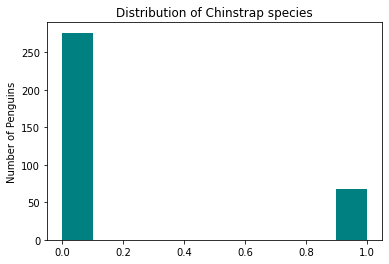

In [4]:
ax = df_penguin_data["is_chinstrap"].hist(grid=False, color="teal")
ax.set_ylabel("Number of Penguins")
ax.set_title("Distribution of Chinstrap species");

There is class imbalance in the distribution of the Penguin species. Chinstrap species make up about 16% of the total penguin population in the dataset. 

<br>

ii) Examine the correlations between your **numerical** attributes and your target variable. Which feature seems most important? Based on the correlations, how would you describe a Chinstrap penguin relative to other penguins in terms of its features (e.g. do they tend to have longer or shorter culmen length, higher or lower body mass, etc)? [2 points]

In [5]:
from pandas.plotting import scatter_matrix
corr_matrix = df_penguin_data.corr()
corr_matrix["is_chinstrap"].sort_values(ascending=False)

is_chinstrap         1.000000
culmen_length_mm     0.448853
culmen_depth_mm      0.320700
flipper_length_mm   -0.180650
body_mass_g         -0.291561
Name: is_chinstrap, dtype: float64

The most important feature for identifying a Chinstrap penguin is the length of the culmen. A Chinstrap penguin will likely have longer culmen and smaller body mass compared to other penguins.

<br>

iii) Create plots for your features that reveal any differences in how they are distributed for the two values of your target variable (`is_chinstrap = 1` and `is_chinstrap = 0`). Remark on any obvservations that may be useful to this classification problem. Hint: consider histograms as well as multivariate scatterplots. [2 points]

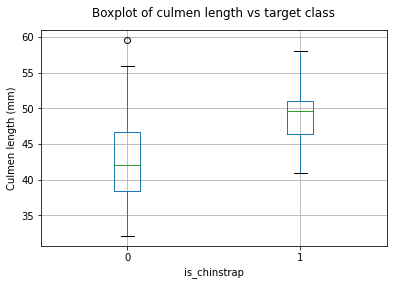

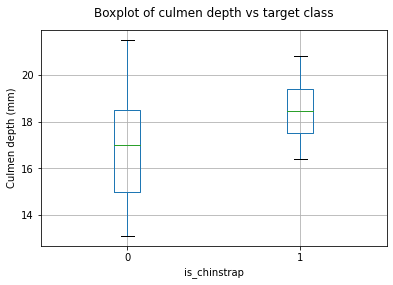

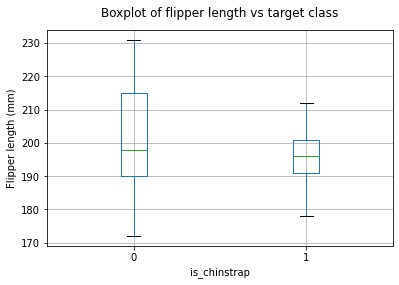

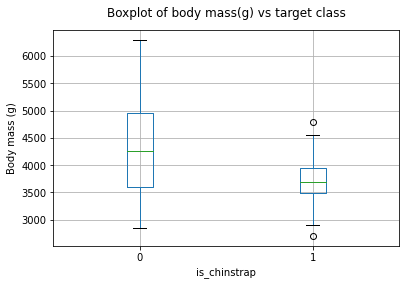

In [6]:
ax = df_penguin_data.boxplot("culmen_length_mm","is_chinstrap");
ax.set_title(" ")
ax.get_figure().suptitle('Boxplot of culmen length vs target class')
ax.set_ylabel("Culmen length (mm)");

ax2 = df_penguin_data.boxplot("culmen_depth_mm","is_chinstrap");
ax2.set_title(" ")
ax2.get_figure().suptitle('Boxplot of culmen depth vs target class')
ax2.set_ylabel("Culmen depth (mm)");

ax3 = df_penguin_data.boxplot("flipper_length_mm","is_chinstrap");
ax3.set_title(" ")
ax3.get_figure().suptitle('Boxplot of flipper length vs target class')
ax3.set_ylabel("Flipper length (mm)");

ax4 = df_penguin_data.boxplot("body_mass_g","is_chinstrap");
ax4.set_title(" ")
ax4.get_figure().suptitle('Boxplot of body mass(g) vs target class')
ax4.set_ylabel("Body mass (g)");

Class imbalance is supported by the IQR of the bixplots

<br>

iv) Does your data contain any outliers? Are there missing values? If so, identify them, and state how you might handle them. [1 point]

In [7]:
outlier1 = df_penguin_data[(df_penguin_data['culmen_length_mm'] >58) & (df_penguin_data['is_chinstrap'] == 0)]
outlier2 = df_penguin_data[(df_penguin_data['body_mass_g'] >4700) & (df_penguin_data['is_chinstrap'] == 1)]
outlier3 = df_penguin_data[(df_penguin_data['body_mass_g'] < 2800) & (df_penguin_data['is_chinstrap'] == 1)]
pd.concat([outlier1,outlier2,outlier3])

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,is_chinstrap
253,Biscoe,59.6,17.0,230.0,6050.0,MALE,0
189,Dream,52.0,20.7,210.0,4800.0,MALE,1
190,Dream,46.9,16.6,192.0,2700.0,FEMALE,1


I will delete the outliers as shown below:

In [8]:
df_penguin_data= df_penguin_data.drop(labels=[253,189,190], axis=0)

<br>

### B) Train/Test Split [1 point]

Split the dataset into train and test subsets, keeping 80% of records for training. Make sure this split is reproducible (i.e. you get the same split every time you run the cell). Also ensure that the class distribution in your test set matches the class distribution in your training set (same ratio of non-stroke to stroke) and prove this is the case.

> Note: You will not use this test data when training or fine-tuning your models, you will only use it at the end for final model evaluation. 

In [9]:
 df_penguin_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,is_chinstrap
count,339.000000,339.000000,339.000000,339.000000,341.000000
mean,43.843068,17.142773,200.828909,4198.967552,0.193548
std,5.396188,1.973860,14.017748,794.351152,0.395660
min,32.100000,13.100000,172.000000,2850.000000,0.000000
25%,39.200000,15.550000,190.000000,3550.000000,0.000000
50%,44.100000,17.300000,197.000000,4050.000000,0.000000
75%,48.450000,18.700000,213.000000,4750.000000,0.000000
max,58.000000,21.500000,231.000000,6300.000000,1.000000


In [10]:
# drop all rows with missing values in "sex column as we cannot impute the gender"
df_penguin_data = df_penguin_data.dropna(subset=['sex'], how='any')

In [11]:
X = df_penguin_data[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = df_penguin_data['is_chinstrap']

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit 
splitter=StratifiedShuffleSplit(n_splits=1,random_state=42)
for train,test in splitter.split(X,y):     # this will splits the index
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]
print(y_train.value_counts())  
print(y_test.value_counts())

0    238
1     59
Name: is_chinstrap, dtype: int64
0    27
1     7
Name: is_chinstrap, dtype: int64


<br>

### C) Baseline and Heuristic Models [4 points]

Before diving into ML, it's useful to first come up with a simple benchmark model, whose performance you will then try to beat. A simple rules-based (or "heuristic") model approach, based on learnings from EDA, is often a good place to start. It helps you build an intuition around the problem you are trying to solve. 






i) Without even using machine learning, come up with a simple rules-based model using 1-3 features to predict the target label. Evaluate the accuracy of this approach on your test dataset. How does this compare to random 50:50 guessing of the target label? How does this compare with a classifier that predicts 0 (non-Chinstrap) every time? [3 points]

In [14]:
from sklearn.dummy import DummyClassifier

strategies = ['most_frequent', 'prior','stratified', 'uniform', 'constant']
  
test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 42, constant = 0)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 42)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    test_scores.append(score)
test_scores


[0.7941176470588235,
 0.7941176470588235,
 0.6470588235294118,
 0.4411764705882353,
 0.7941176470588235]

/home/nnamdi/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


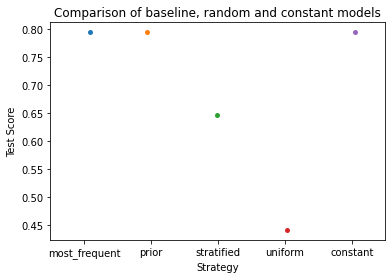

In [15]:
ax = sns.stripplot(strategies, test_scores);
ax.set(xlabel ='Strategy', ylabel ='Test Score', title='Comparison of baseline, random and constant models')
plt.show()

<br>

ii) What if it was more important that we succesfully identify all Chinstrap penguins and not miss any, even if this means we sometimes have False Positives? Name two scoring metrics that might do a better job in this context than accuracy. Then calculate the F1 score of your model instead of its accuracy. How do the F1 scores compare between your model, the 50:50 guessing model, and the "always non-Chinstrap" model considered in (i) above?

Recall and ROC will successfully identify all Chinstrap penguins at the risk of having false positives.



In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

strategies = ['most_frequent', 'prior', 'stratified', 'uniform', 'constant']
  
F1_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 42, constant = 0)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 42)
    y_train_pred = cross_val_predict( dclf, X_train, y_train, cv=3)
    f1 = f1_score(y_train, y_train_pred)
    F1_scores.append(f1)
F1_scores

[0.0, 0.0, 0.21621621621621623, 0.35242290748898675, 0.0]

/home/nnamdi/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


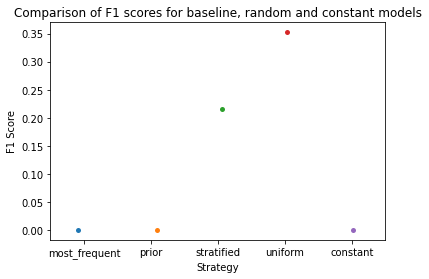

In [17]:
ax = sns.stripplot(strategies, F1_scores);
ax.set(xlabel ='Strategy', ylabel ='F1 Score', title='Comparison of F1 scores for baseline, random and constant models')
plt.show()

<br>

### D) Prepare the Data Inputs for Machine Learning [6 points]

Your heuristic model can be taken as your 'benchmark' model, or "latest best". You will now try to beat its performance using ML techniques. 

First, build data preprocessing pipeline that transforms your train and test datasets into a form suitable for ML training and inference. You can write your own functions, or leverage the scikit-learn pipelines we demonstrated in class. The choice is yours. 

Ensure your data preprocessing pipeline accounts for the following:
* input features are on the correct scale
* categorical features can be processed by the model
* missing or erroneous values are handled


**NOTE**: if using scikit-learn's ColumnTransformer, please be sure to separate your target labels from your features prior to applying the ColumnTransformer, because ColumnTransformer drops the column names and may return them in an unexpected order. 


In [18]:
training_data = X_train.copy()
training_labels = y_train.copy()

### Pipeline for numerical variables
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

### ColumnTransformer for training data set
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer 
num_attribs = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
cat_attribs = ["island"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)])

X_train_tr = full_pipeline.fit_transform(training_data)

In [19]:
test_data = X_test.copy()
test_labels = y_test.copy()

### Pipeline for numerical variables
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler())])

### ColumnTransformer for training data set
try:
    from sklearn.compose import ColumnTransformer
except ImportError:
    from future_encoders import ColumnTransformer 
num_attribs = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
cat_attribs = ["island"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)])

X_test_tr = full_pipeline.fit_transform(test_data)

<br>

### E) Train and Compare ML Classifiers [3 points]

**Without modifying any of the provided hyperparameters**, train the following three classifiers using F1 score and Cross-Validation (CV). 

> Note: you **do not** need to optimize any of these models to receive full marks for this assignment. We won't judge model optimization until later assignments, except for the Bonus question at the end. 


In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# use these classifiers, without changing their settings
perceptron_clf = SGDClassifier(max_iter=100, loss='perceptron', random_state=42)
tree_clf = DecisionTreeClassifier(max_features=2, max_depth=2, random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)


i) Compare their CV scores side-by-side in a plot, showing the mean score plus error bars representing the standard deviation. Which model performs the best? Does it perform better than your original heuristic model? [2 points]

> NOTE: if a model does not converge or gives only NaNs as output, try changing `random_state` and see if that makes a difference. 


In [21]:
from sklearn.model_selection import cross_val_score
CV_score_perceptron = cross_val_score(perceptron_clf, X_train_tr, training_labels, cv=3, scoring="accuracy", verbose=5)
CV_score_tree = cross_val_score(tree_clf, X_train_tr, training_labels, cv=3, scoring="accuracy", verbose=5)
CV_score_ADA = cross_val_score(ada_clf, X_train_tr, training_labels, cv=3, scoring="accuracy", verbose=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

[CV] END ................................ score: (test=0.990) total time=   0.0s
[CV] END ................................ score: (test=0.980) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.879) total time=   0.0s
[CV] END ................................ score: (test=0.859) total time=   0.0s
[CV] END ................................ score: (test=0.889) total time=   0.0s
[CV] END ................................ score: (test=0.990) total time=   0.1s
[CV] END ................................ score: (test=1.000) total time=   0.1s
[CV] END ................................ score: (test=0.980) total time=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


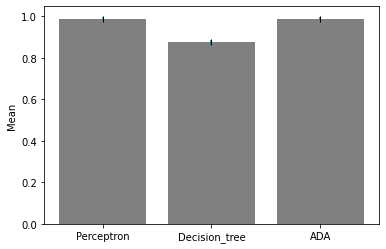

,Mean,Std
Perceptron,0.9899,0.0082
Decision_tree,0.8754,0.0126
ADA,0.9899,0.0082


In [23]:
algo_score = [CV_score_perceptron,CV_score_tree,CV_score_ADA]
algo_names = ['Perceptron','Decision_tree','ADA']
dicts={}
values = []
for score in algo_score:
    mean = round(score.mean(),4)
    std = round(score.std(),4)
    values.append((mean, std))
for i in range(len(algo_names)):
    dicts[algo_names[i]] = values[i]

df_CV_scores = pd.DataFrame.from_dict(dicts, orient='index', columns=['Mean','Std'])
x = df_CV_scores.index
y = df_CV_scores['Mean']
e = df_CV_scores['Std']
plt.bar(x,y, color="grey")
plt.ylabel("Mean")
plt.errorbar(x, y, yerr=e, fmt='o',ecolor = 'teal',color='black',marker = "|")
plt.show()
df_CV_scores

ii) Now take the DecisionTree classifier and plot its CV score for a few different values of `max_features` and `max_depth`. Do you notice any impact on performance? State any reasons you can think of that migth explain the changes (or lack thereof) that you see. [1 point]

In [24]:
dict = {}
for i in range(1,6):
    tree_clf = DecisionTreeClassifier(max_features=i, max_depth=i, random_state=42)
    CV_score_tree = cross_val_score(tree_clf, X_train_tr, training_labels, cv=3, scoring="accuracy", verbose=5)
    mean_score = CV_score_tree.mean()
    #tree_score.append(mean_score)
    dict[i]=mean_score


[CV] END ................................ score: (test=0.808) total time=   0.0s
[CV] END ................................ score: (test=0.798) total time=   0.0s
[CV] END ................................ score: (test=0.798) total time=   0.0s
[CV] END ................................ score: (test=0.879) total time=   0.0s
[CV] END ................................ score: (test=0.859) total time=   0.0s
[CV] END ................................ score: (test=0.889) total time=   0.0s
[CV] END ................................ score: (test=0.980) total time=   0.0s
[CV] END ................................ score: (test=0.990) total time=   0.0s
[CV] END ................................ score: (test=0.980) total time=   0.0s
[CV] END ................................ score: (test=0.990) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.980) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

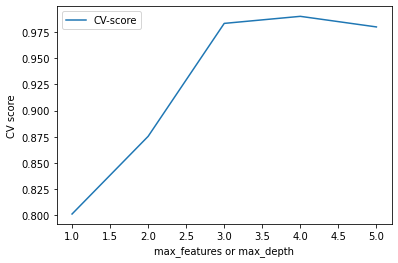

In [26]:
tree_score_df = pd.DataFrame.from_dict(dict, orient='index', columns=['CV-score'])
tree_score_df.plot(xlabel=("max_features or max_depth"),ylabel="CV score");


At a max_depth of 2 leaves or maximum of 2 features, the decision tree classifier underfitted the training data whcih explained why it had the lowest cross validation score. As can be seen in the plot above, increasing the number of features or maximum depth of the tree directly proportionally increased the cross-validation score of the decision tree classifier up until 4 features after which increases in the number of features resulted to overfitting of data.

<br>

### F) Examine Misclassifications [2 points]

Plot a confusion matrix for your choice of best model and answer the following: 
* What are the True Positive and True Negative rates of your model? What is your model's Precision? What is its Recall?
* If you wanted to ensure that you did not 'miss' any Chinstraps (i.e. all actual Chinstraps are correctly identified), should you optimize for Precision or Recall?

 

> Note: We'll end the assignment here, but a natural next-step would be to examine the samples that were misclassified searching for trends that explain why (e.g. are these samples near the threshold of a decision boundary? etc). 

In [28]:
# Use cross validation to generate predictions
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(perceptron_clf, X_train_tr, training_labels, cv=3)

# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(training_labels, y_train_pred)

array([[235,   3],
       [  0,  59]])

In [32]:
TP = 59
FP = 3
FN = 0
TN = 235

# TPR = TP/TP+FN
TPR = 59 / (59 + 0)
TPR


1.0

In [33]:
# TNR=TN/(FP+TN)
TNR = 235 / (3+235)
TNR

0.9873949579831933

In [34]:
from sklearn.metrics import precision_score, recall_score
print("precision score is: ",precision_score(training_labels, y_train_pred)) # accuracy of positive predictions
print("recall score is: ",recall_score(training_labels, y_train_pred))

precision score is:  0.9516129032258065
recall score is:  1.0


I would optimize Precision if I do not want to miss any Chinstraps.

<br>

# Part 2) Multilabel Classification [BONUS - 2 points]
***

> NOTE : This section is entirely optional. Attempt it if you'd like extra practice. Marks scored here will count towards the total for this assignment and can compensate for any points lost in Part 1. The final value of the assignment will is capped at 100%. 

Now your goal is to successfully classify each sample into one of the following species: Chinstrap, Adélie, or Gentoo.

Show and explain the steps you take. Use any ML classification method of choice. Feel free to experiment with hyperparemeter tuning (e.g. grid search) or any other technique you think might lead to a better model. 

We have re-loaded the original dataset for you below, and the target variable will now be `species`. 


In [ ]:
df_penguin_data = pd.read_csv("./2022-a1-penguin-classification.csv")
df_penguin_data.head()

In [ ]:
forest_clf.fit(X_train, y_train)

<br>